## Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from yellowbrick.regressor import ResidualsPlot

## load the dataset

In [2]:
train_data = pd.read_csv('data/train.csv', index_col='Id')
test_data = pd.read_csv('data/test.csv', index_col='Id')

## Exploratory Data Analysis

### Data Summary

In [4]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

- There are 79 features 37 of which are numerical and 43 of which are categorical

In [3]:
num_cols = train_data.select_dtypes(exclude='object').columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [4]:
cat_cols = train_data.select_dtypes(include='object').columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

- **Lets check for missing values**

In [5]:
na = train_data.isna().sum().sort_values(ascending=False)
na = pd.DataFrame(na, columns=['Count'])
na['percentage'] = (na['Count'] / train_data.shape[0] *100).round(2)
na = na[na['Count'] > 0]
na

,Count,percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


- **So there are 19 columns with missing values**

- **Based on this, we can drop the columns with missing values more than 90% like** 
    - **_PoolQC, MiscFeature, Alley_**


- **We can replace the missing values with 'No' when Na means 'No' in categorical columns like**
    - **Replace the missing values with 'NoBsmt' in these columns**
        - **_BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2_**
    - **Replace the missing values with 'NoGarage' in these columns**
        - **_GarageType, GarageFinish, GarageQual, GarageCond_**
    - **Replace the missing values with 'NoFence' in column _Fence_**
    - **Replace the missing values with 'NoFP' in column _FireplaceQu_**

- **We will add binary columns like _HasBsmt_ and _HasGarage_ that will be 1 if the feature is present and 0 otherwise**

---

 - **For numerical columns, we will impute the missing values with    suitable strategies like (mean, median, or mode)**

In [6]:
dropped_cols = na[na['percentage']>90].index.tolist()
dropped_cols

['PoolQC', 'MiscFeature', 'Alley']

In [7]:
cleaned_train_data = train_data.drop(dropped_cols, axis=1)
cleaned_test_data = test_data.drop(dropped_cols, axis=1)

In [8]:
cleaned_train_data['Fence'] = cleaned_train_data['Fence'].fillna('NoFence')
cleaned_test_data['Fence'] = cleaned_test_data['Fence'].fillna('NoFence')

In [9]:
cleaned_train_data['FireplaceQu'] = cleaned_train_data['FireplaceQu'].fillna('NoFP')
cleaned_test_data['FireplaceQu'] = cleaned_test_data['FireplaceQu'].fillna('NoFP')

- Add binary columns 'HasBsmt'

In [10]:
cleaned_train_data['HasBsmt'] = cleaned_train_data['BsmtCond'].isna().astype('Int64').map({1:0, 0:1})
cleaned_test_data['HasBsmt'] = cleaned_test_data['BsmtCond'].isna().astype('Int64').map({1:0, 0:1})

- Fill the missing values with 'NoBsmt' in categorical columns that starts with 'Bsmt'

In [11]:
[c for c in cat_cols if c.startswith('Bsmt')]

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [12]:
for col in [c for c in cat_cols if c.startswith('Bsmt')]:
    cleaned_train_data[col] = cleaned_train_data[col].fillna('NoBsmt')
    cleaned_test_data[col] = cleaned_test_data[col].fillna('NoBsmt')

- Add binary columns 'HasGarage'

In [13]:
cleaned_train_data['HasGarage'] = cleaned_train_data['GarageCond'].isna().astype('Int64').map({1:0, 0:1})
cleaned_test_data['HasGarage'] = cleaned_test_data['GarageCond'].isna().astype('Int64').map({1:0, 0:1})

In [26]:
[c for c in cat_cols if c.startswith('Garage')]

['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [14]:
for col in [c for c in cat_cols if c.startswith('Garage')]:
    cleaned_train_data[col] = cleaned_train_data[col].fillna('NoGarage')
    cleaned_test_data[col] = cleaned_test_data[col].fillna('NoGarage')

- Fill the missing values with 0 in columns GarageYrBlt that to indicate that the garage was not built

In [15]:
cleaned_train_data['GarageYrBlt'].fillna(0, inplace=True)
cleaned_test_data['GarageYrBlt'].fillna(0, inplace=True)

In [31]:
cleaned_train_data.isna().sum().sort_values(ascending=False)

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
KitchenQual      0
              ... 
Foundation       0
ExterCond        0
ExterQual        0
Exterior2nd      0
HasGarage        0
Length: 79, dtype: int64

- For LotFrontage, we will visualize the distribution of the feature first to know what is the best strategy to impute the missing values

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

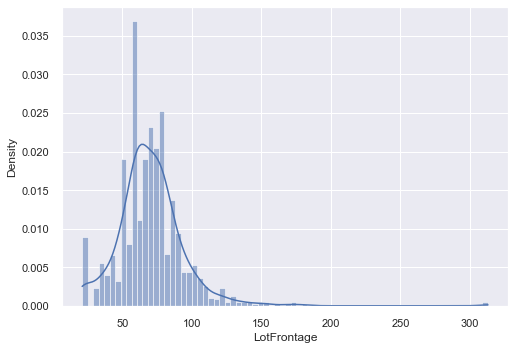

In [38]:
sns.histplot(cleaned_train_data['LotFrontage'], kde=True, stat='density')

- LotFrontage is right skewed so the best strategy to impute the missing values is fill with median()

In [16]:
cleaned_train_data['LotFrontage'].fillna(cleaned_train_data['LotFrontage'].median(), inplace=True)
cleaned_test_data['LotFrontage'].fillna(cleaned_train_data['LotFrontage'].median(), inplace=True)

In [17]:
cleaned_train_data['MasVnrType'].fillna('None', inplace=True)
cleaned_test_data['MasVnrType'].fillna('None', inplace=True)

In [18]:
cleaned_train_data['MasVnrArea'].fillna(0, inplace=True)
cleaned_test_data['MasVnrArea'].fillna(0, inplace=True)

In [19]:
cleaned_train_data['Electrical'].fillna(cleaned_train_data['Electrical'].mode()[0], inplace=True)
cleaned_test_data['Electrical'].fillna(cleaned_train_data['Electrical'].mode()[0], inplace=True)

In [20]:
test_missing = cleaned_test_data.isna().sum().sort_values(ascending=False).to_dict()
test_missing

{'MSZoning': 4,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'Utilities': 2,
 'Functional': 2,
 'Exterior1st': 1,
 'KitchenQual': 1,
 'SaleType': 1,
 'Exterior2nd': 1,
 'TotalBsmtSF': 1,
 'BsmtUnfSF': 1,
 'BsmtFinSF2': 1,
 'GarageCars': 1,
 'BsmtFinSF1': 1,
 'GarageArea': 1,
 'FireplaceQu': 0,
 'Fireplaces': 0,
 'BedroomAbvGr': 0,
 'TotRmsAbvGrd': 0,
 'KitchenAbvGr': 0,
 'GarageYrBlt': 0,
 'HalfBath': 0,
 'FullBath': 0,
 'GarageType': 0,
 'MSSubClass': 0,
 'GarageFinish': 0,
 'LowQualFinSF': 0,
 'HasBsmt': 0,
 'SaleCondition': 0,
 'YrSold': 0,
 'MoSold': 0,
 'MiscVal': 0,
 'Fence': 0,
 'PoolArea': 0,
 'ScreenPorch': 0,
 '3SsnPorch': 0,
 'EnclosedPorch': 0,
 'OpenPorchSF': 0,
 'WoodDeckSF': 0,
 'PavedDrive': 0,
 'GarageCond': 0,
 'GarageQual': 0,
 'GrLivArea': 0,
 'CentralAir': 0,
 '2ndFlrSF': 0,
 'Neighborhood': 0,
 'OverallCond': 0,
 'OverallQual': 0,
 'HouseStyle': 0,
 'BldgType': 0,
 'Condition2': 0,
 'Condition1': 0,
 'LandSlope': 0,
 '1stFlrSF': 0,
 'LotConfig': 0,
 'LandContour': 0,


In [21]:
test_missing = [col for col in test_missing if test_missing[col] > 0]

In [22]:
for c in test_missing:
    cleaned_test_data[c].fillna(cleaned_test_data[c].mode()[0], inplace=True)

### Data Visualization

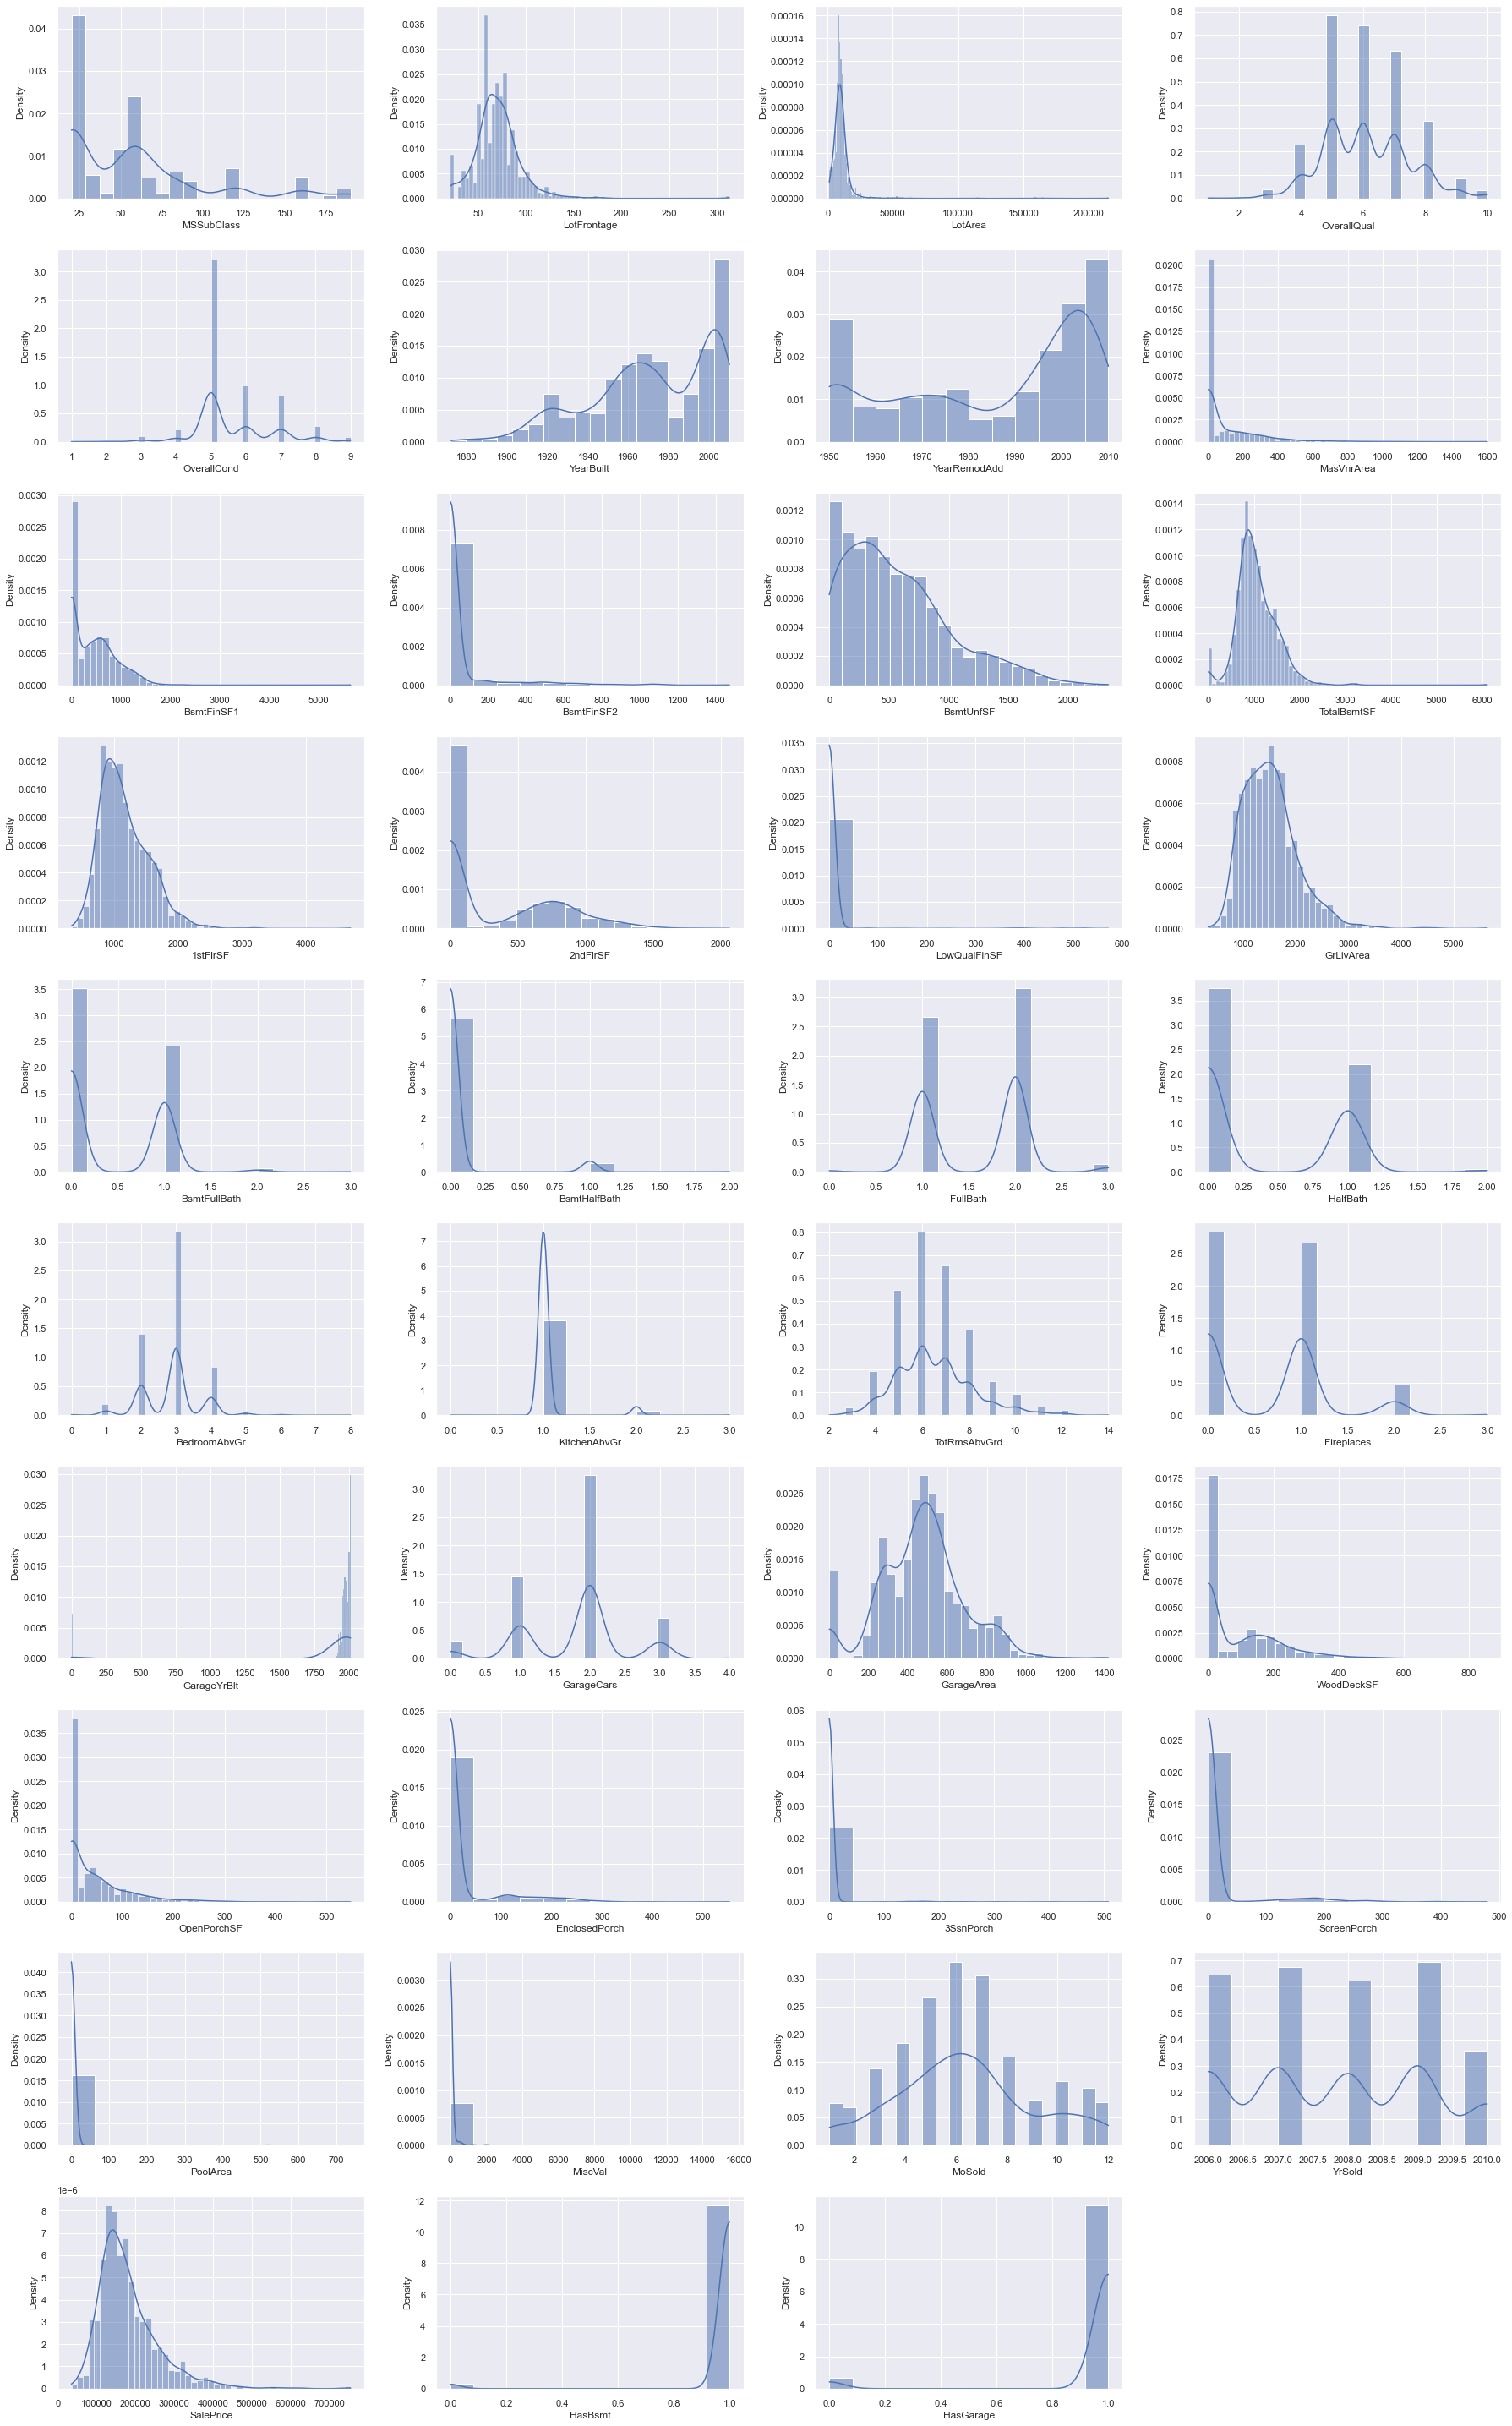

In [36]:
cols = cleaned_train_data.select_dtypes(exclude='object').columns.to_list()
fig = plt.figure(figsize=(25, 40))
for i, col in enumerate(cols):
    plt.subplot(10, 4, i+1)
    sns.histplot(cleaned_train_data[col], kde=True, stat='density')
fig.tight_layout(pad=1)


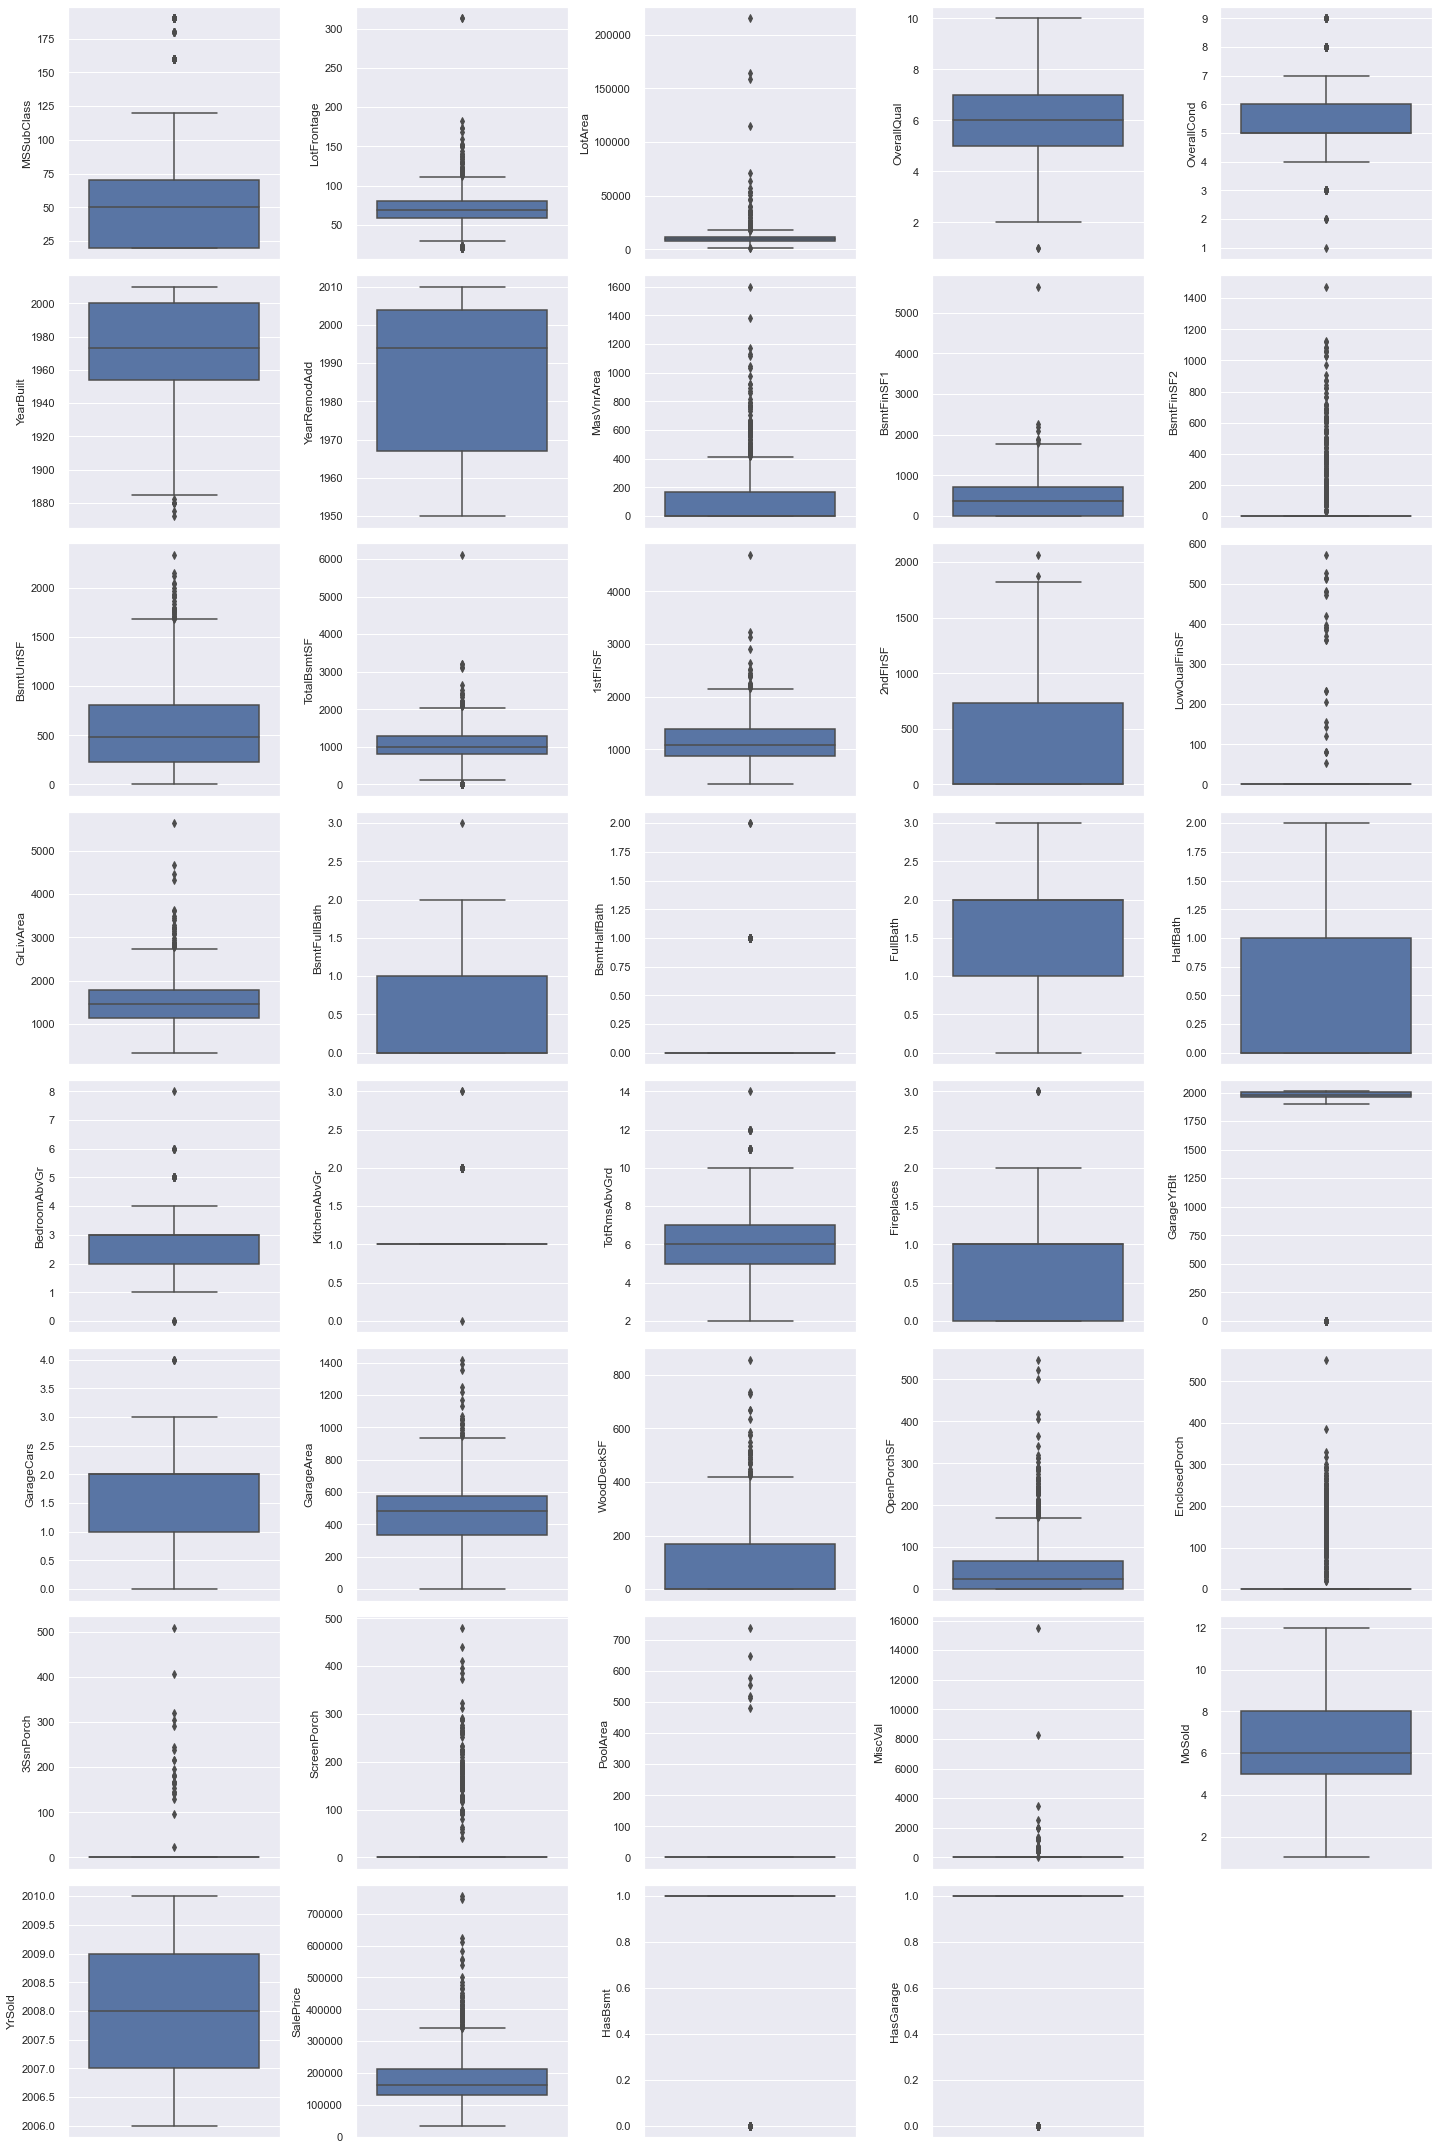

In [37]:
fig= plt.figure(figsize=(20, 30))
cols = cleaned_train_data.select_dtypes(exclude='object').columns.to_list()
for i, col in enumerate(cols):
    plt.subplot(8, 5, i+1)
    sns.boxplot(data=cleaned_train_data, y=col)
fig.tight_layout(pad=1)

- As we can see there are some columns that are right skewed so we can use log transformation for these columns

In [23]:
log_transform_cols = ['LotFrontage', 'LotArea', 'BsmtFinSF1', '1stFlrSF','GrLivArea', 'SalePrice']

In [24]:
cleaned_train_data.isna().sum().sort_values(ascending=False)

MSSubClass      0
KitchenAbvGr    0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
               ..
ExterQual       0
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
HasGarage       0
Length: 79, dtype: int64

In [25]:
for c in log_transform_cols:
    cleaned_train_data[c] = np.log1p(cleaned_train_data[c])
    if c!= 'SalePrice':
        cleaned_test_data[c] = np.log1p(cleaned_test_data[c])

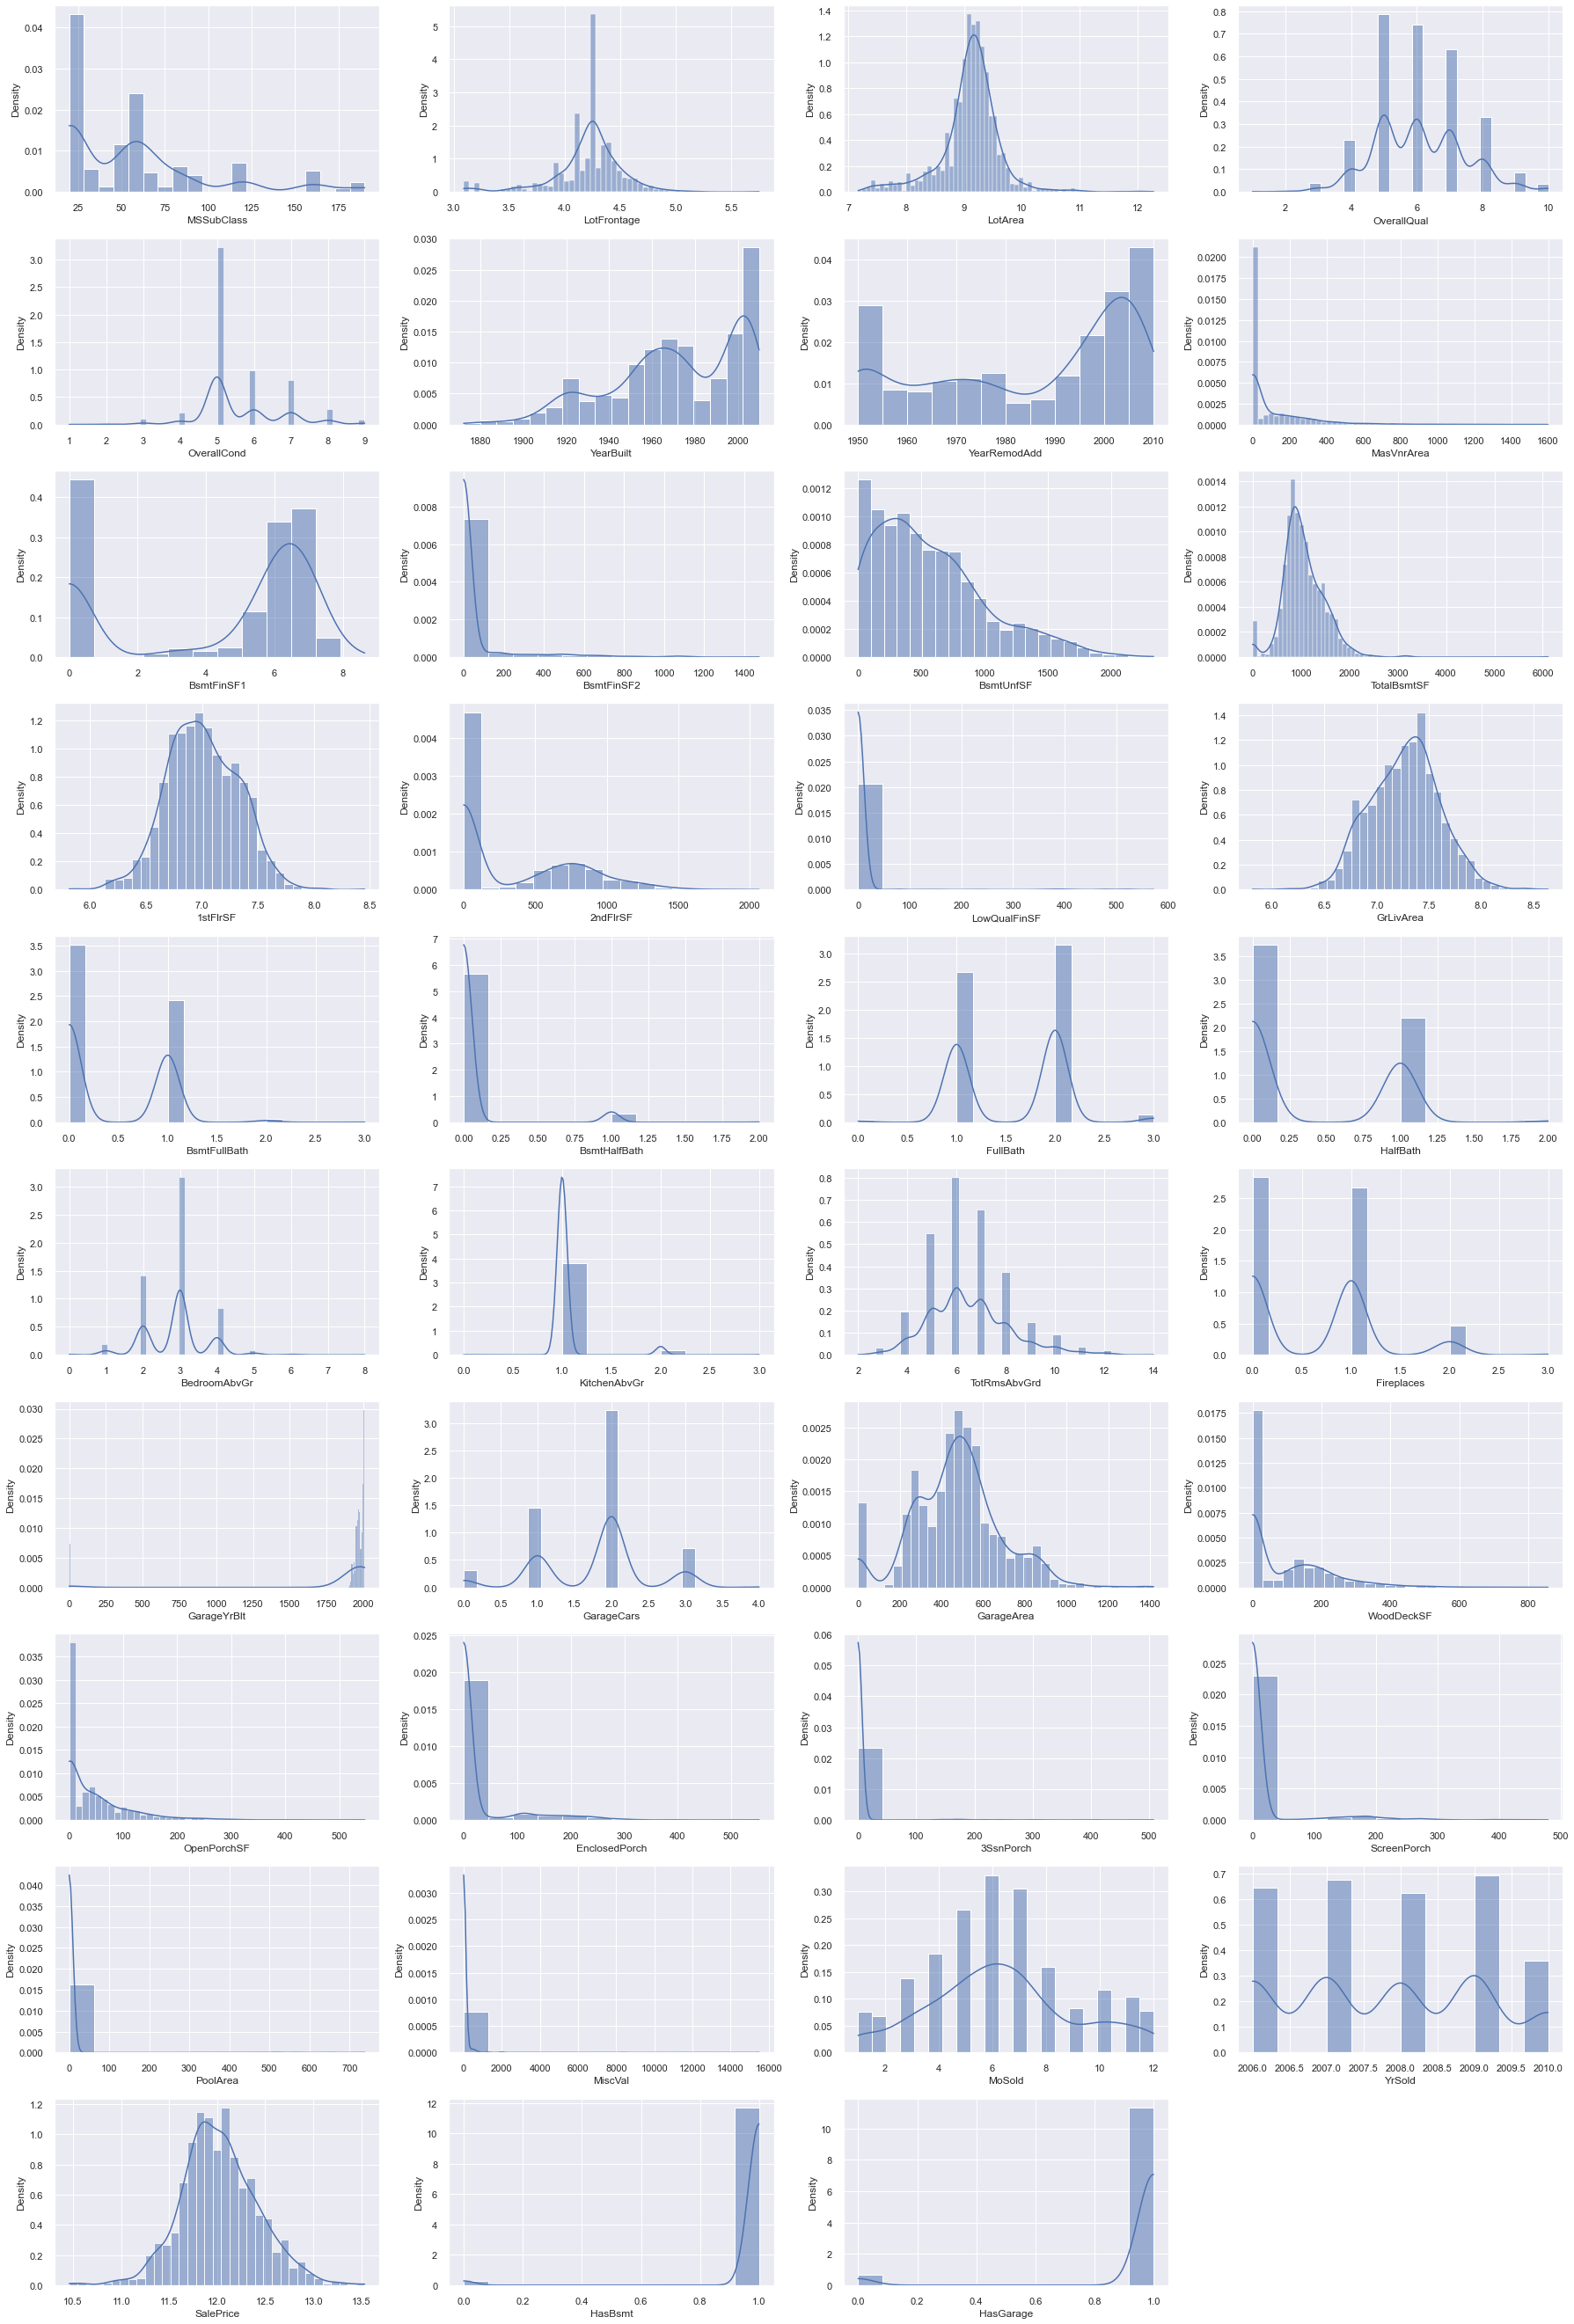

In [53]:
fig = plt.figure(figsize=(25, 40))
cols = cleaned_train_data.select_dtypes(exclude='object').columns
for i, col in enumerate(cols):
    plt.subplot(11, 4, i+1)
    sns.histplot(cleaned_train_data[col], kde=True, stat='density')
fig.tight_layout(pad=1)

- As we see the distribution of the columns that are transformed is better than the original distribution

### Handling Outliers

<AxesSubplot:ylabel='SalePrice'>

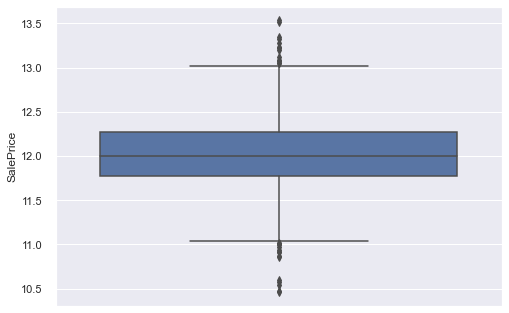

In [55]:
sns.boxplot(y=cleaned_train_data['SalePrice'])

<AxesSubplot:ylabel='SalePrice'>

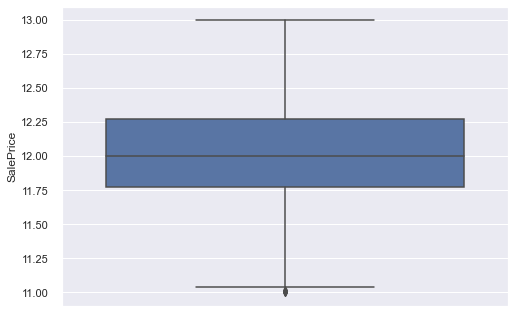

In [61]:
sns.boxplot(y=cleaned_train_data['SalePrice'][cleaned_train_data['SalePrice']>11][cleaned_train_data['SalePrice']<13])

In [27]:
cleaned_train_data= cleaned_train_data[cleaned_train_data['SalePrice']>11][cleaned_train_data['SalePrice']<13]

## Feature Engineering

- We can create new features like "TotalSF" by adding "1stFlrSF" and "2ndFlrSF" to represent the total square footage of the house

- We can create new features representing the number of years since the last remodeling by subtracting "YearRemodAdd" from "YearBuilt" 

In [28]:
cleaned_train_data["TotalSF"]= cleaned_train_data["1stFlrSF"] + cleaned_train_data["2ndFlrSF"]
cleaned_test_data["TotalSF"]= cleaned_test_data["1stFlrSF"] + cleaned_test_data["2ndFlrSF"]

In [29]:
cleaned_train_data['Last_Remod'] = cleaned_train_data['YearRemodAdd'] - cleaned_train_data['YearBuilt']
cleaned_test_data['Last_Remod'] = cleaned_test_data['YearRemodAdd'] - cleaned_test_data['YearBuilt']

In [30]:
corr = cleaned_train_data[cleaned_train_data.select_dtypes(exclude='object').columns].corr()

In [31]:
top_corr = corr[abs(corr['SalePrice'])>0.5].index
top_corr

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

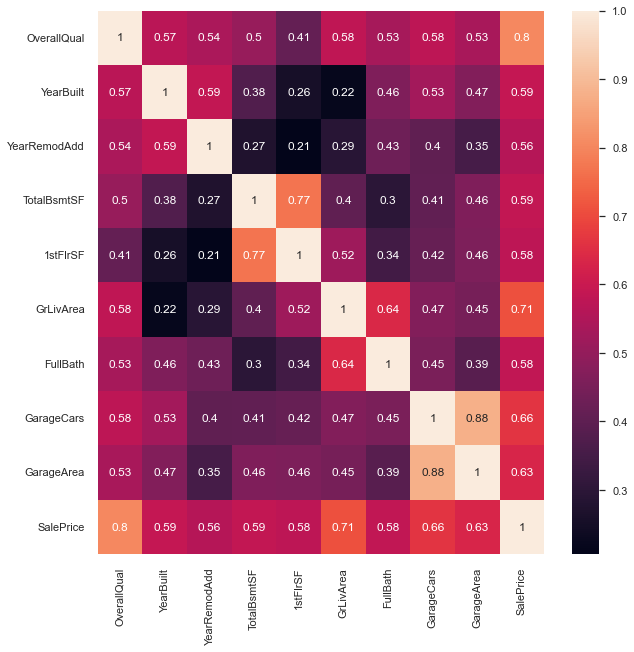

In [97]:
plt.figure(figsize=(10, 10))
sns.heatmap(cleaned_train_data[top_corr].corr(), annot=True)
plt.show()

## Modeling

In [32]:
X = cleaned_train_data.drop('SalePrice', axis=1)
y = cleaned_train_data['SalePrice']
X_2 = cleaned_test_data

In [33]:
for col in cleaned_train_data.select_dtypes('object').columns:
    l = LabelEncoder()
    X[col] = l.fit_transform(X[col])
    X_2[col] = l.transform(X_2[col])

In [34]:
s = StandardScaler()
X = s.fit_transform(X)
X_2 = s.transform(X_2)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbmodel= GradientBoostingRegressor(loss='squared_error', learning_rate=0.04, n_estimators=1000)
gbmodel.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.04, n_estimators=1000)

In [51]:
gbmodel.score(X_test, y_test)

0.8822118654676596

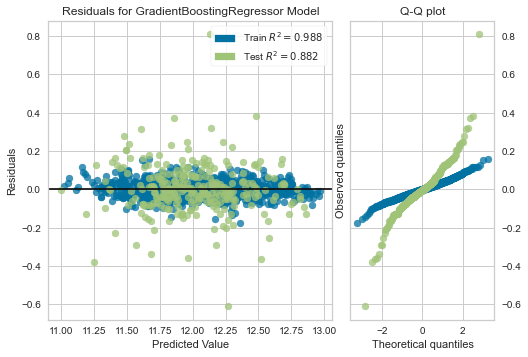

<AxesSubplot:title={'center':'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [52]:
visualizer = ResidualsPlot(gbmodel, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [54]:
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

LinearRegression()

In [55]:
lrmodel.score(X_test, y_test)

0.8890965451720633

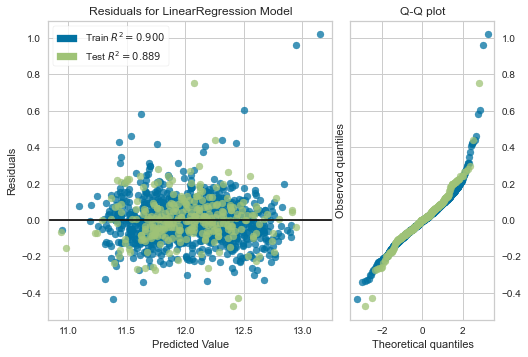

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [56]:
visualizer = ResidualsPlot(lrmodel, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [100]:

rfmodel = RandomForestRegressor(n_estimators=100)
rfmodel.fit(X_train, y_train)

RandomForestRegressor()

In [101]:
rfmodel.score(X_test, y_test)

0.8467823195523879

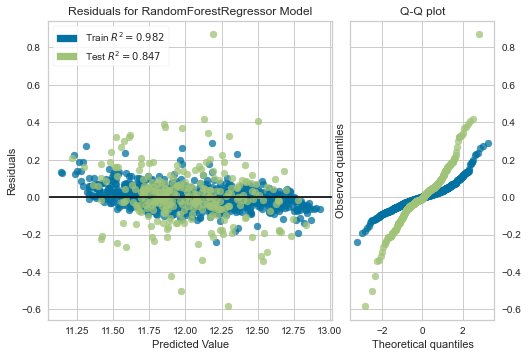

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [123]:
visualizer = ResidualsPlot(rfmodel, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [120]:
etmodel = ExtraTreesRegressor(n_estimators=100)
etmodel.fit(X_train, y_train)

ExtraTreesRegressor()

In [121]:
etmodel.score(X_test, y_test)

0.8568573913322295

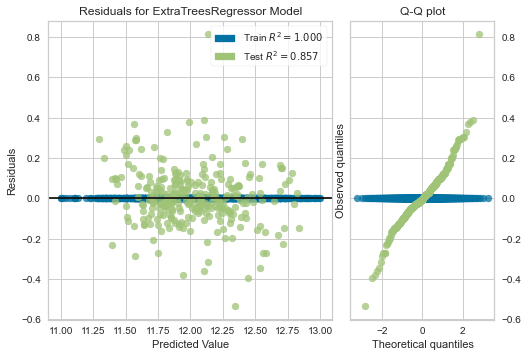

<AxesSubplot:title={'center':'Residuals for ExtraTreesRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [124]:
visualizer = ResidualsPlot(etmodel, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [131]:
svrmodel = SVR(kernel='linear')
svrmodel.fit(X_train, y_train)

SVR(kernel='linear')

In [132]:
svrmodel.score(X_test, y_test)

0.9020008661802097

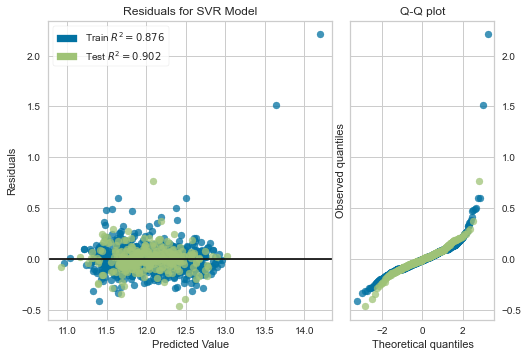

<AxesSubplot:title={'center':'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [133]:
visualizer = ResidualsPlot(svrmodel, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [305]:
models = ['GradientBoosting', 'LinearRegression', 'RandomForest', 'ExtraTrees', 'SVR']
test_accuracy = [gbmodel.score(X_test, y_test), lrmodel.score(X_test, y_test), rfmodel.score(X_test, y_test), etmodel.score(X_test, y_test), svrmodel.score(X_test, y_test)]
train_accuracy = [gbmodel.score(X_train, y_train), lrmodel.score(X_train, y_train), rfmodel.score(X_train, y_train), etmodel.score(X_train, y_train), svrmodel.score(X_train, y_train)]

In [307]:
models_df = pd.DataFrame(data={'Models':models, 'Test_Accuracy':test_accuracy, 'Train_Accuracy':train_accuracy})

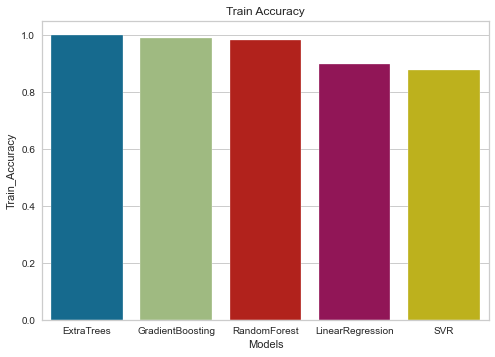

In [314]:
sns.barplot(data=models_df.sort_values(by='Train_Accuracy', ascending=False), y='Train_Accuracy', x='Models')
plt.title('Train Accuracy')
plt.show()

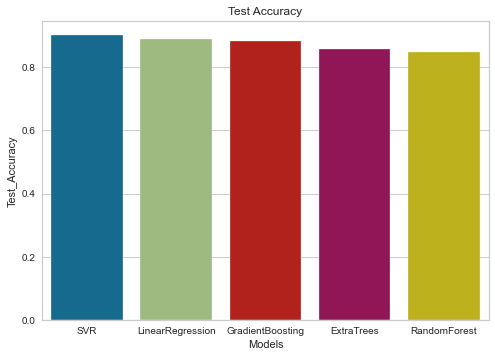

In [315]:
sns.barplot(data=models_df.sort_values(by='Test_Accuracy', ascending=False), y='Test_Accuracy', x='Models')
plt.title('Test Accuracy')
plt.show()

- As we can see SVR has the highest accuracy for testing data